In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score, confusion_matrix, precision_score, recall_score
 
# importing machine learning models for prediction
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('./data/sample_inbalance_data/inbalance_data.csv')
print(df.shape)
display(df.head(3))
print(f'\n\nThe numebr of Nas:\n {df.isna().sum()}')
print(f'\n\ncolumns information:\n{df.info()}')

distribution = dict(df['Response'].value_counts())
print(f"\n\n\nThe ratio between Response=1 and Response=0 is:\n {round(distribution[1]/distribution[0]*100, 3)}%")

(382154, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0




The numebr of Nas:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium   



numeric dataframe shape:

 (382154, 9)
objective dataframe size:

 (382154, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Gender          382154 non-null  int64
 1   Vehicle_Age     382154 non-null  int64
 2   Vehicle_Damage  382154 non-null  int64
dtypes: int64(3)
memory usage: 8.7 MB
None


Merged data frame shape:
 (382154, 12)


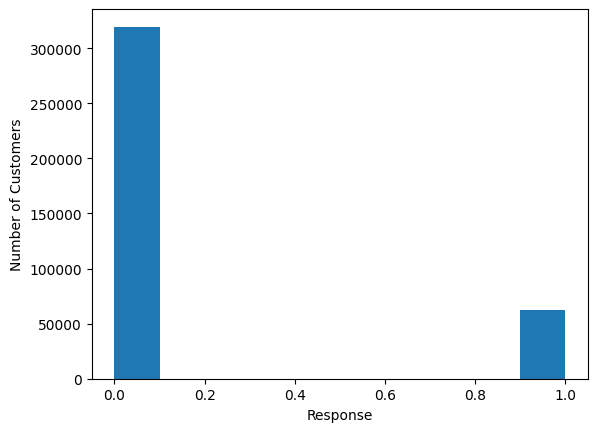

In [4]:
plt.hist(df['Response'])
plt.xlabel('Response')
plt.ylabel('Number of Customers')

numeric_df = df.select_dtypes(include=np.number)
object_df = df.select_dtypes(include=['object', 'bool', 'string'])

print('\n\nnumeric dataframe shape:\n\n', numeric_df.shape)
print('objective dataframe size:\n\n', object_df.shape)

object_df_to_numeric = object_df.apply(preprocessing.LabelEncoder().fit_transform)
print(object_df_to_numeric.info())

df_final = pd.concat([object_df_to_numeric, numeric_df], axis=1)
print('\n\nMerged data frame shape:\n',df_final.shape)

In [5]:
x = df_final.loc[:, df_final.columns != 'Response']
y = df_final.loc[:, df_final.columns == 'Response']

In [15]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'n_neighbors': 8}


,Response
0,1
1,0
2,0
3,0
4,0
...,...
76426,0
76427,0
76428,0
76429,1


Accuracy for our training dataset with tuning is : 83.10%
Precision score is: 0.405
Recall score is: 0.064


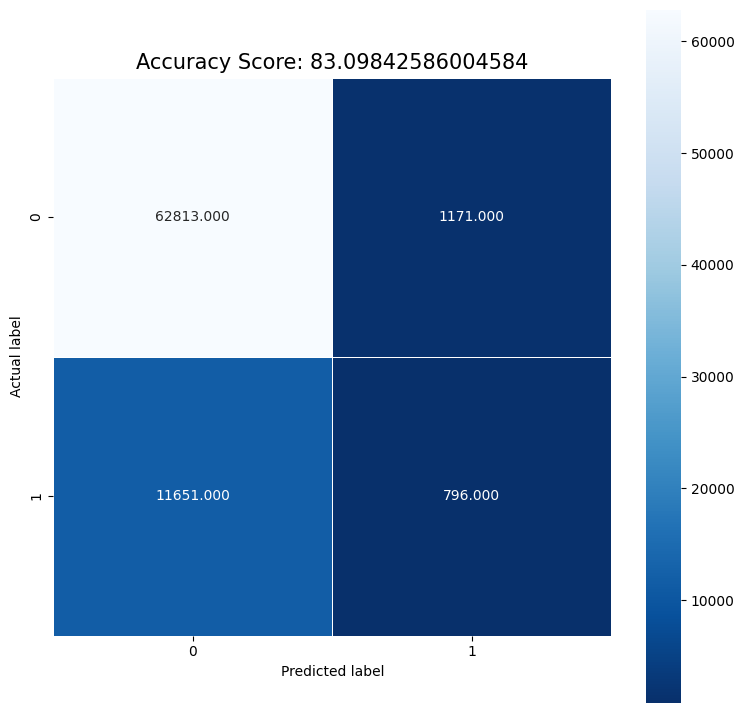

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
probs = grid_search.predict_proba(X_test)

accuracy = grid_search.best_score_ *100

df_y_pred = pd.DataFrame(y_pred)
df_probs = pd.DataFrame(probs)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
display(y_test)

df_results = pd.concat([df_y_pred, y_test, df_probs], axis=1)
df_results.columns = ['prediction', 'true_value', 'prob_0', 'prob_1']

cm_matrix = confusion_matrix(y_test, df_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)


print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(f'Precision score is: {round(precision_score(y_test, y_pred), 3)}')
print(f'Recall score is: {round(recall_score(y_test, y_pred), 3)}')

### Undersampling
Choose random subset of the majority class. Here the majority is Response=0

The distribution of response=0 & 1 is:

 0    62601
1    62601
Name: Response, dtype: int64
Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'n_neighbors': 8}


,Response
0,0
1,0
2,0
3,0
4,0
...,...
76426,1
76427,0
76428,0
76429,0




Precision score is: 0.402

Recall score is: 0.064


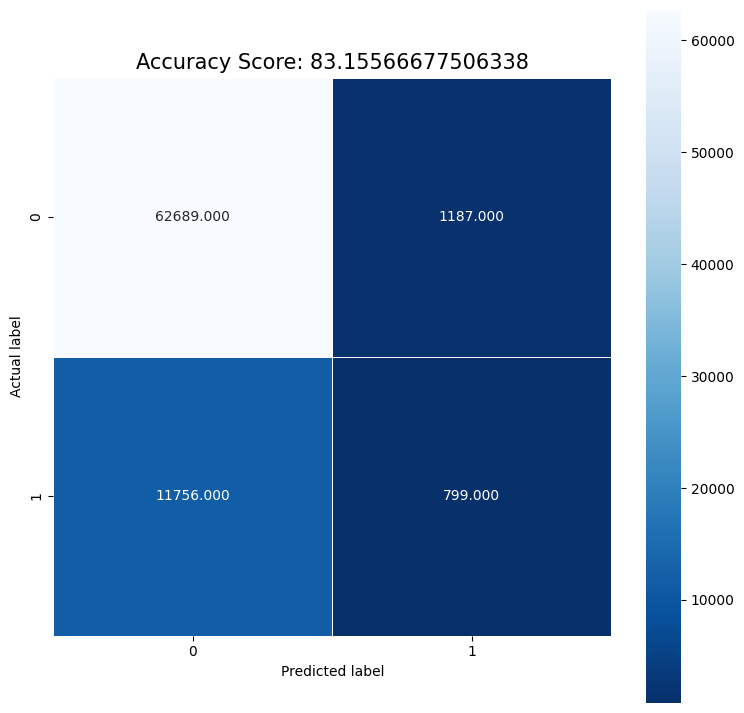

In [18]:
from imblearn.under_sampling import NearMiss

x_under, y_under = NearMiss(version=1, n_neighbors=3).fit_resample(x, y)
print('The distribution of response=0 & 1 is:\n\n', y_under['Response'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
probs = grid_search.predict_proba(X_test)

accuracy = grid_search.best_score_ *100

df_y_pred = pd.DataFrame(y_pred)
df_probs = pd.DataFrame(probs)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
display(y_test)

df_results = pd.concat([df_y_pred, y_test, df_probs], axis=1)
df_results.columns = ['prediction', 'true_value', 'prob_0', 'prob_1']
cm_matrix = confusion_matrix(y_test, df_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)
print(f'\n\nPrecision score is: {round(precision_score(y_test, y_pred), 3)}')
print(f'\nRecall score is: {round(recall_score(y_test, y_pred), 3)}')

### Oversampling
Choosing more samples from minority class

The distribution of response=0 & 1 is:

 0    319553
1    319553
Name: Response, dtype: int64
Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'n_neighbors': 1}


,Response
0,0
1,1
2,0
3,0
4,0
...,...
127817,1
127818,1
127819,0
127820,0


Precision score is: 0.849
Recall score is: 0.991


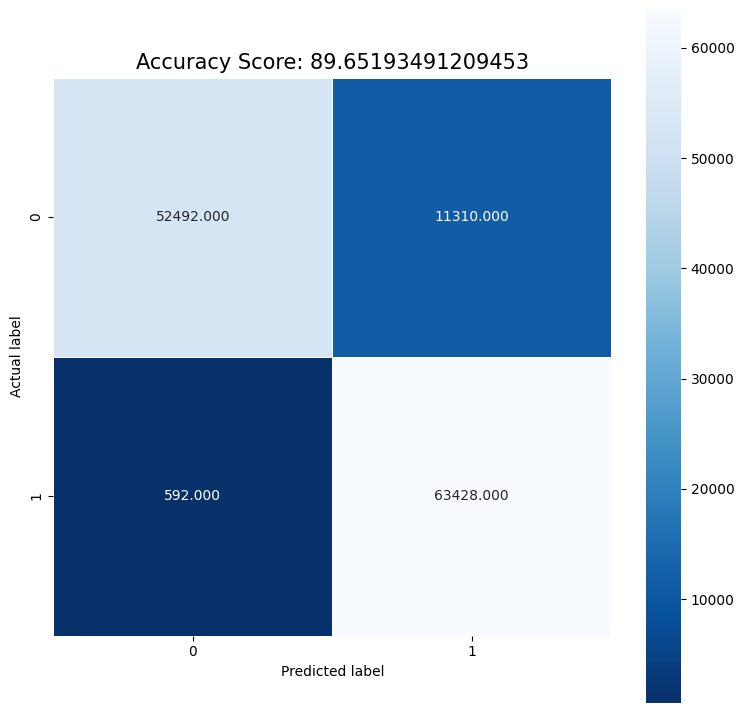

In [19]:
from imblearn.over_sampling import RandomOverSampler


OS = RandomOverSampler(sampling_strategy='auto', random_state=0)
x_over, y_over = OS.fit_resample(x, y)

print('The distribution of response=0 & 1 is:\n\n', y_over['Response'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.20)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
probs = grid_search.predict_proba(X_test)

accuracy = grid_search.best_score_ *100

df_y_pred = pd.DataFrame(y_pred)
df_probs = pd.DataFrame(probs)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
display(y_test)

df_results = pd.concat([df_y_pred, y_test, df_probs], axis=1)
df_results.columns = ['prediction', 'true_value', 'prob_0', 'prob_1']

cm_matrix = confusion_matrix(y_test, df_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

print(f'Precision score is: {round(precision_score(y_test, y_pred), 3)}')
print(f'Recall score is: {round(recall_score(y_test, y_pred), 3)}')

### Data augmentation
This method uses the minority class by using nearest neighbor approach. 

The distribution of response=0 & 1 is:

 0    319553
1    319553
Name: Response, dtype: int64
Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'n_neighbors': 1}


,Response
0,1
1,0
2,1
3,1
4,1
...,...
127817,1
127818,1
127819,0
127820,0


Precision score is: 0.847
Recall score is: 0.99


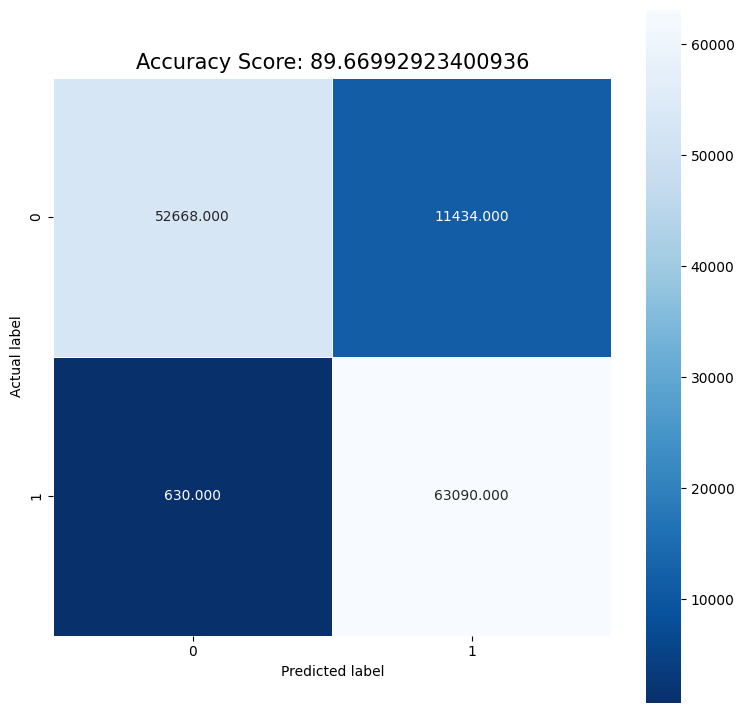

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)
x_aug, y_aug = OS.fit_resample(x, y)

print('The distribution of response=0 & 1 is:\n\n', y_aug['Response'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(x_aug, y_aug, test_size=0.20)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
probs = grid_search.predict_proba(X_test)

accuracy = grid_search.best_score_ *100

df_y_pred = pd.DataFrame(y_pred)
df_probs = pd.DataFrame(probs)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
display(y_test)

df_results = pd.concat([df_y_pred, y_test, df_probs], axis=1)
df_results.columns = ['prediction', 'true_value', 'prob_0', 'prob_1']

cm_matrix = confusion_matrix(y_test, df_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

print(f'Precision score is: {round(precision_score(y_test, y_pred), 3)}')
print(f'Recall score is: {round(recall_score(y_test, y_pred), 3)}')